<a href="https://colab.research.google.com/github/CM-007/DS_ASS/blob/main/Ass05_Startups(MLL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import all Libraries**

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot


**Read the data**

In [125]:
data = pd.read_csv('/content/50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#**EDA** for data cleaning and understanding data

In [126]:
# Rename columns - remove space between column names
data = data.rename(columns={
    "R&D Spend":"RandD_Spend",
    "Marketing Spend":"Marketing_Spend"
})

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RandD_Spend      50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [128]:
# Check for missing values
data.isnull().sum()

RandD_Spend        0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

In [129]:
data.describe()

,RandD_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [130]:
# Finding Data duplication
data[data.duplicated()]
# No duplicated data

,RandD_Spend,Administration,Marketing_Spend,State,Profit


# **Correlation Matrix**

In [131]:
data.corr()

<ipython-input-131-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,RandD_Spend,Administration,Marketing_Spend,Profit
RandD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatterplot betwen var allong with histrogram

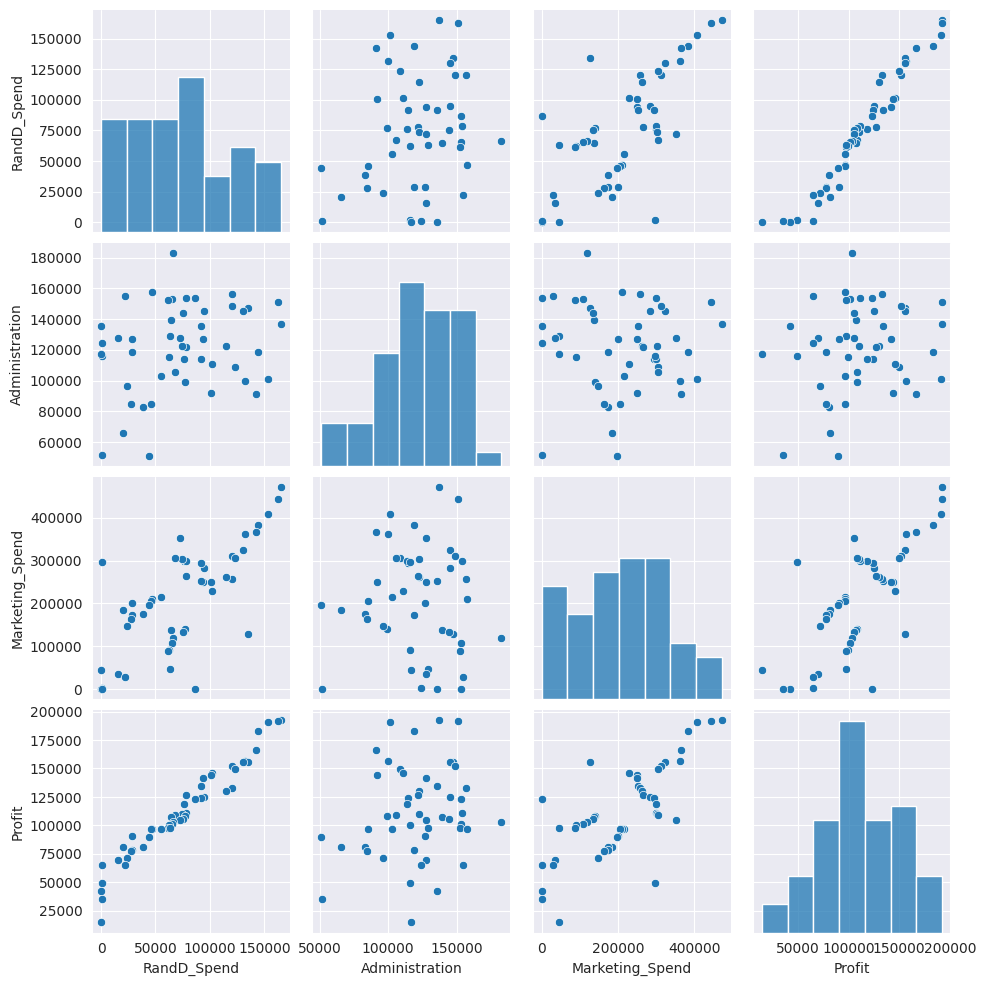

In [132]:
sns.set_style(style="darkgrid")
sns.pairplot(data)

Heres we found Administration column correlation value has between -3 to 3 .

i.e. this column has less effect to fit the model for price prediction

we drop that column if you have

In [133]:
# Drop column Administration
data = data.drop(['Administration'],axis=1)
data.head(1)

,RandD_Spend,Marketing_Spend,State,Profit
0,165349.2,471784.1,New York,192261.83


# **Preparing a model**
# Build Model

In [134]:
model =  smf.ols('Profit~RandD_Spend+Marketing_Spend',data= data).fit()

# **Model Testing**

In [135]:
# Coefficient of Beta values
model.params

Intercept          46975.864221
RandD_Spend            0.796584
Marketing_Spend        0.029908
dtype: float64

In [136]:
# Finding tvalues and pvalues
print("*** T-Values ***\n",model.tvalues,'\n\n\n','*** P-Values ***\n',model.pvalues)
# Here , alpha is greater than all columns pvalues

*** T-Values ***
 Intercept          17.463582
RandD_Spend        19.265555
Marketing_Spend     1.927052
dtype: float64 


 *** P-Values ***
 Intercept          3.504062e-22
RandD_Spend        6.040433e-24
Marketing_Spend    6.003040e-02
dtype: float64


In [137]:
# Finding R^2 values
(model.rsquared,model.rsquared_adj)
# This model is showing GOOD model

(0.9504503015559763, 0.9483418037498477)

# **Model Validation**
#**1>Collinearity check**

# **VIF**

Finding problem if any columns occuring here

In [138]:
RandD_Spend = smf.ols('RandD_Spend~Marketing_Spend',data=data).fit().rsquared
vif_RandD_Spend = 1/(1-RandD_Spend)
Marketing_Spend = smf.ols('Marketing_Spend~RandD_Spend',data=data).fit().rsquared
vif_Marketing_Spend = 1/(1-Marketing_Spend)

In [139]:
# Storing vif values in a data frame
d1 = {'Variables':['RandD_Spend','Marketing_Spend'],'VIF' :[vif_RandD_Spend,vif_Marketing_Spend]}

vif_frame = pd.DataFrame(d1)
vif_frame

# if VIF > 20 - that variable creating a collinearity problem.
# Here, 0 columns > 20 no problem occur
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation



,Variables,VIF
0,RandD_Spend,2.103206
1,Marketing_Spend,2.103206


# **2>Residual(Error) Analysis**

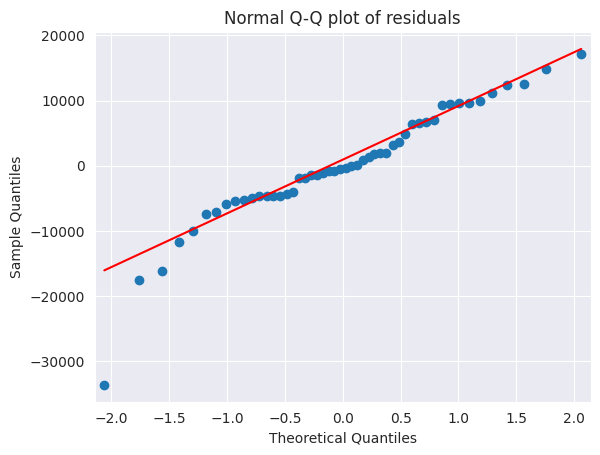

In [140]:
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [141]:
# to print index of values whoes y value is less than -30000
list(np.where(model.resid<-30000))

[array([49])]

# **Residual plot for homoscedasticity : constant Variable**

In [142]:
# function defination for standardization i.e. z-score
# Usr deffine function
def get_standardized_values(vals):
  return (vals - vals.mean())/vals.std()  # This is z score = (Xi - mean)/std.


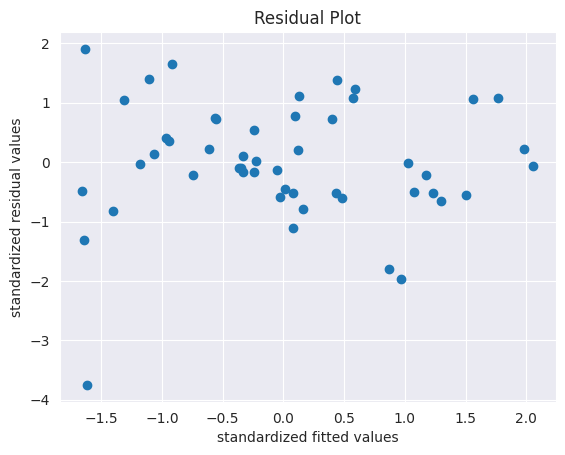

In [143]:
plt.scatter(get_standardized_values(model.fittedvalues), # fittedvalues is y^-hat
           get_standardized_values(model.resid) # resid is error
           )
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

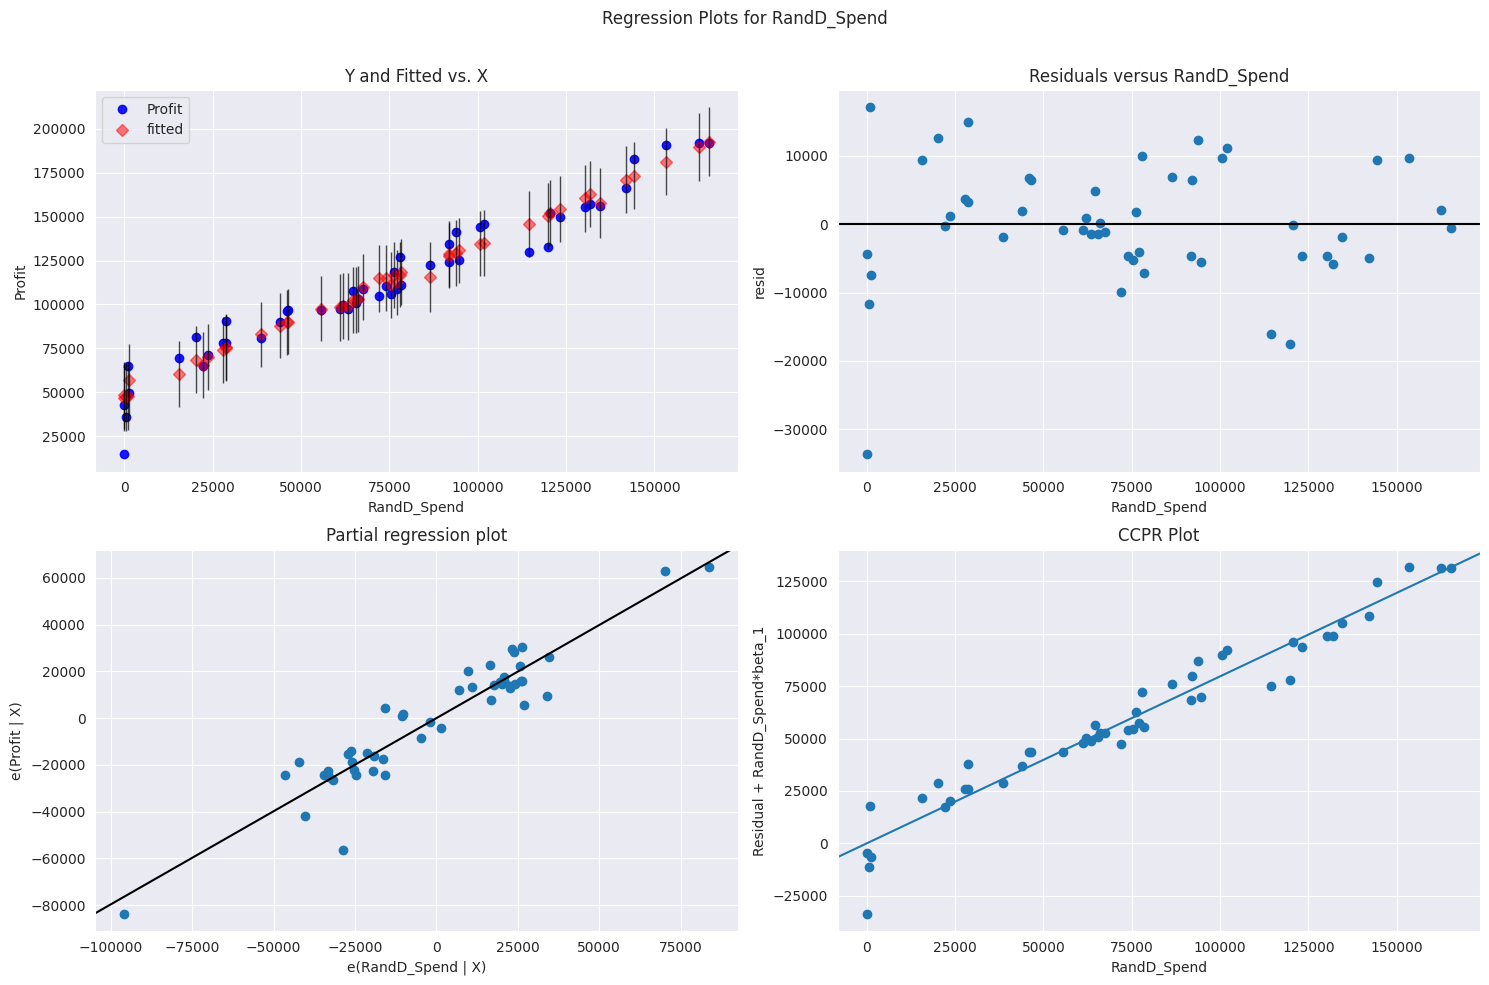

In [144]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable
fig=plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(model,'RandD_Spend',fig=fig)
plt.show()

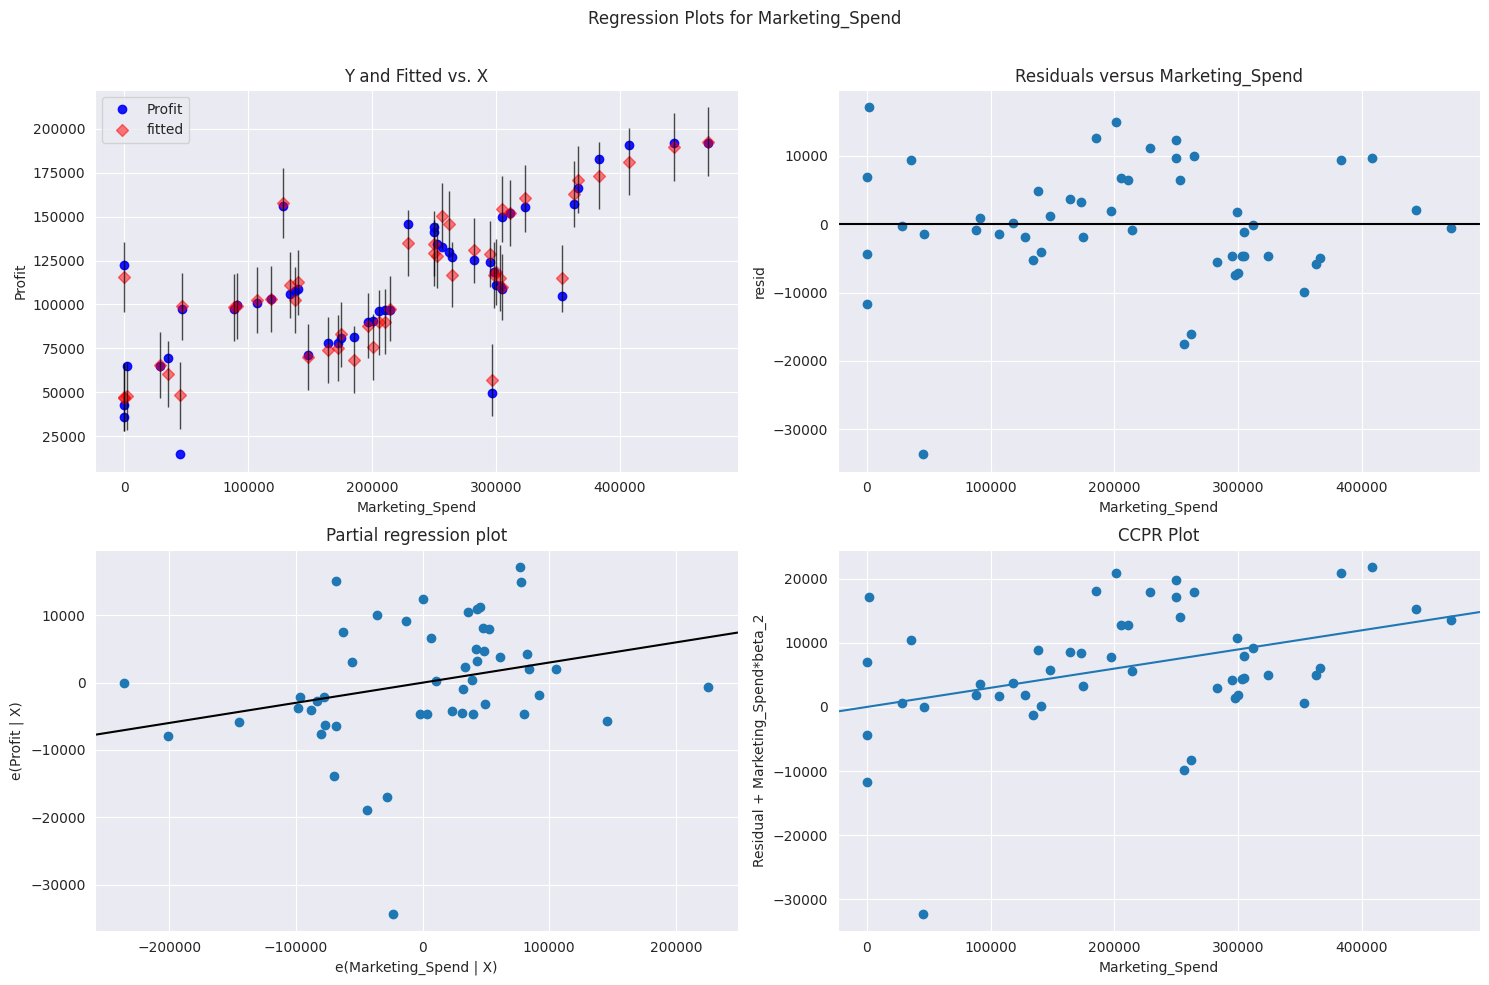

In [145]:
fig=plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(model,'Marketing_Spend',fig=fig)
plt.show()

# **Model Deletion Diagnostics (checking Outliers or Influencers)**

Two Techniques :

1. Cook's Distance

2. Leverage value

In [146]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance

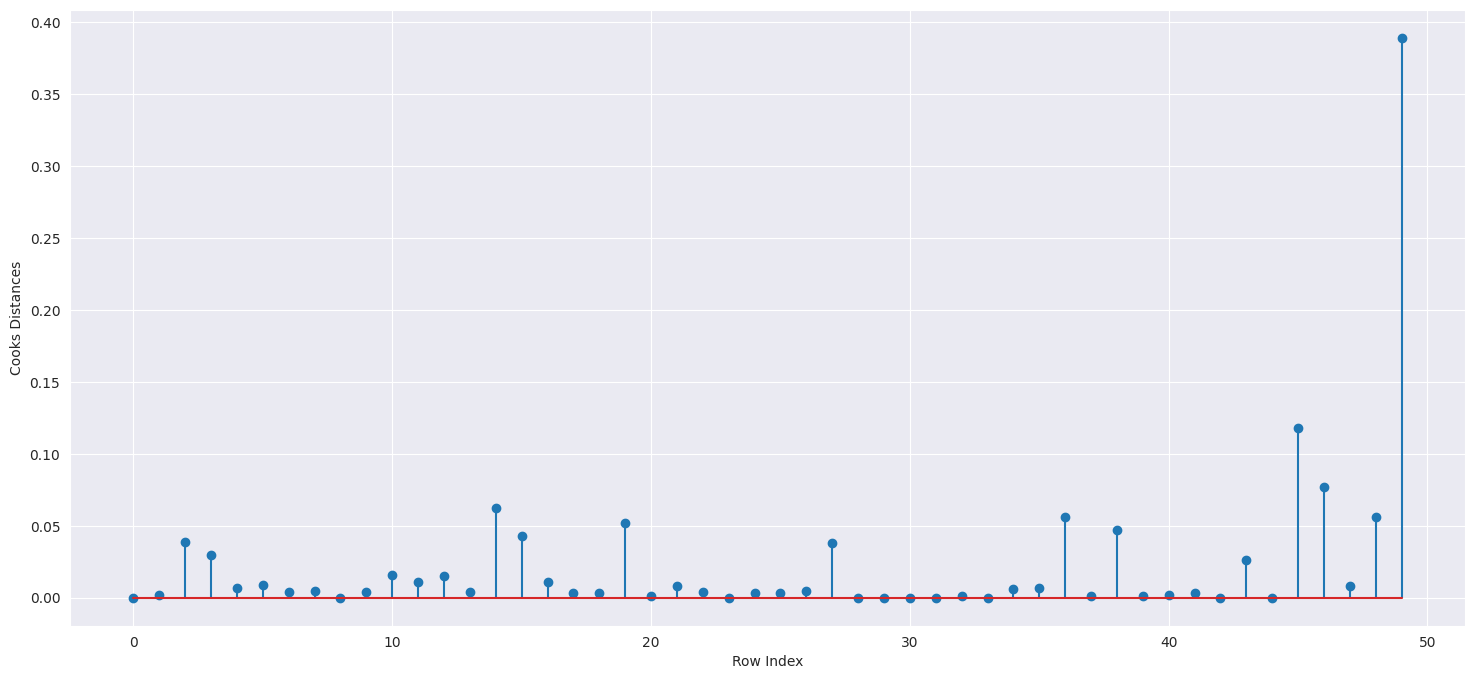

In [147]:
fig = plt.subplots(figsize=(18,8))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distances')
plt.show()

In [148]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.3894886227924922)

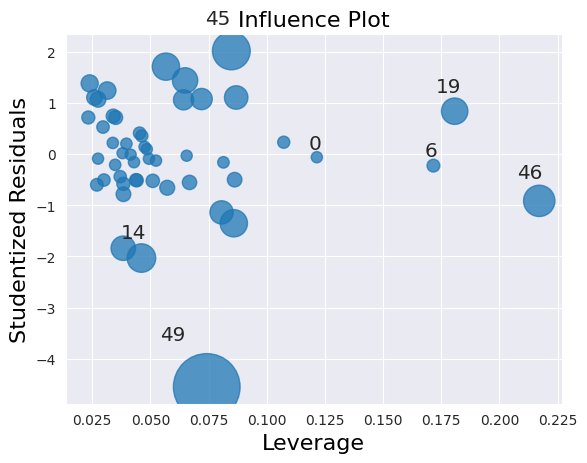

In [149]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [150]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data.shape[1]
n=data.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.3

In [151]:
data[data.index.isin([49])]

,RandD_Spend,Marketing_Spend,State,Profit
49,0.0,45173.06,California,14681.4


# **Improving the Model**

In [152]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
data1=data.drop(data.index[[49]],axis=0).reset_index(drop=True)
data1.head(4)

,RandD_Spend,Marketing_Spend,State,Profit
0,165349.20,471784.10,New York,192261.83
1,162597.70,443898.53,California,191792.06
2,153441.51,407934.54,Florida,191050.39
3,144372.41,383199.62,New York,182901.99


# **Model Deletion Diagnostics and Final Model**

In [153]:
final_model=smf.ols("Profit~RandD_Spend+Marketing_Spend",data=data1).fit()

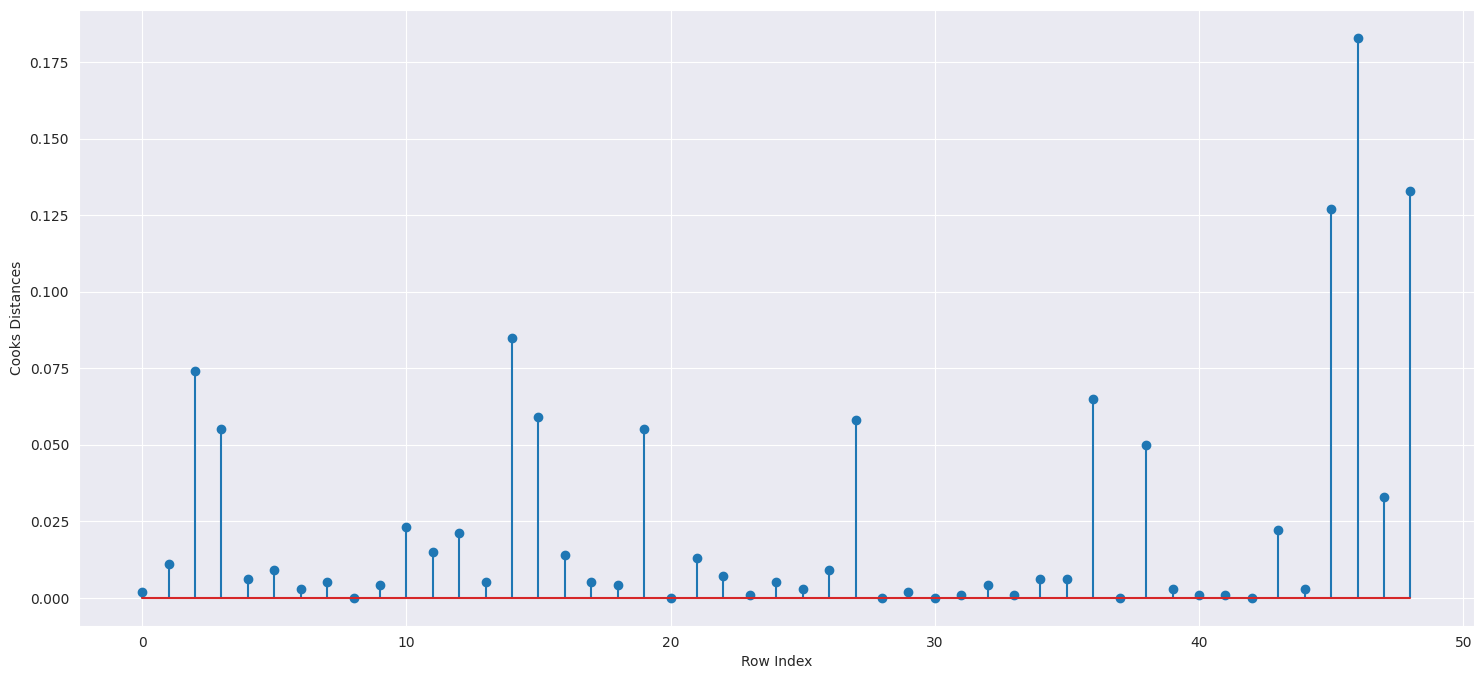

In [157]:
(c,_)=final_model.get_influence().cooks_distance
# here, we again finding if any data point has high influence or outlier

fig = plt.subplots(figsize=(18,8))
plt.stem(np.arange(len(data1)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distances')
plt.show()



In [156]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(46, 0.18337556491338694)

**no outlier is present in this model**

# **Finally we check the accuracy of the model**

In [158]:
# R squared value tells us how good model is.
(final_model.rsquared,final_model.rsquared_adj)

(0.9610856807456628, 0.9593937538215612)

In [160]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950450
1,Final_Model,0.961086
